In [78]:
## loading dataset

## display cluster variation


## unpooled modeling (on entire dataset.)

## pooled modeling (linear regression - cluster based) ~ kinda like parameter estimation


## hierarchical modeling

# definition of fixed effect(individual level) and random effects parameters(cluster-level)
# MCMC sampling (nuts, draws, tunes and stuff)
# posterior distributions
# regression lines


In [85]:
import pandas as pd
import numpy as np
import pymc3 as pm
import theano
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

The dataset has 16598 rows and 11 columns.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


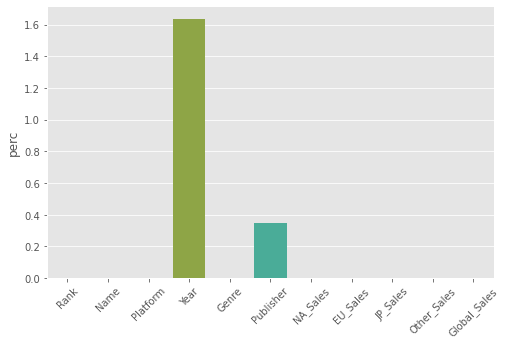

In [80]:
# dataset + abit of preprocessing
def get_data(path):
    # reading dataset
    data = pd.read_csv(path)
    print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

    # preprocessing bits
    null_df = pd.DataFrame((data.isna().sum()/data.shape[0])*100, columns = ['perc'])
    plt.figure(figsize=(8,5))
    sns.barplot(x = null_df.index, y = null_df.perc)
    plt.xticks(rotation = 45)

    # unique values for all categorical columns
    col_unique = {}
    for col in data.columns:
        if data[col].dtype == object:
            col_unique[col] = data[col].unique()


    return data, col_unique

data, unique = get_data('/content/vgsales.csv')
data.head()

In [82]:
# unique

In [94]:
# a = data.Platform.unique().tolist()
# a[:15]

df = ['_' +str(i) for i in range(15)]
platforms = data.Platform.unique().tolist()
dfs = []
for i, j in zip(df, platforms[:15]):
    i = data.loc[data.Platform == j]
    dfs.append(i)

df = dfs[0]
sns.relplot(df['Other_Sales'], df['Global_Sales'])

In [102]:
""" Exploring the relationship between sales in Europe and sales in NA in the platform clusters.
 Then later we can try double clusters: platform and genre."""

# lets see the cluster variation

# helper functions
def scatter_plot(x, y, h):
    plt.figure(figsize = (8,6))
    sns.relplot(x, y, hue = h)
    plt.show()

# pooled scatter plots
def pooled_scatters(data, h):
    df = data[['Platform', 'Genre', 'Other_Sales', 'Global_Sales']]
    # working with 15 random samples
    df = ['_' +str(i) for i in range(15)]
    platforms = data.Platform.unique().tolist()
    dfs = []
    for i, j in zip(df, platforms[:15]):
        i = data.loc[data.Platform == j]
        dfs.append(i)

    for df in dfs:
        plt.figure(figsize = (8,6))
        sns.relplot(df['Other_Sales'], df['Global_Sales'])
        plt.title(f'{df.Platform.head(1)}')
        plt.show()


# fig, axs = plt.subplots(4, 4)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

<Figure size 576x432 with 0 Axes>

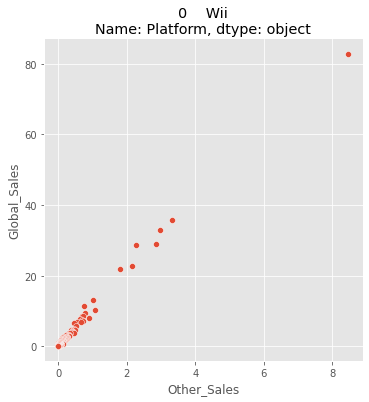

<Figure size 576x432 with 0 Axes>

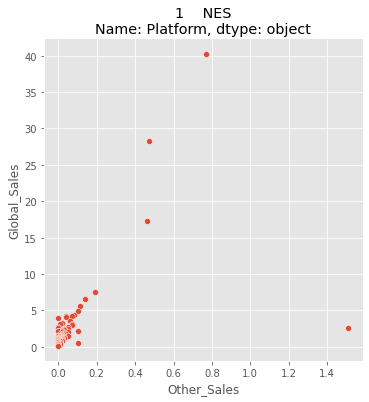

<Figure size 576x432 with 0 Axes>

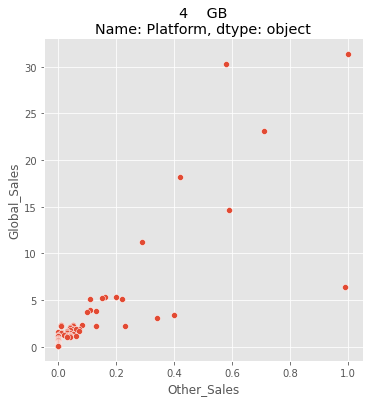

<Figure size 576x432 with 0 Axes>

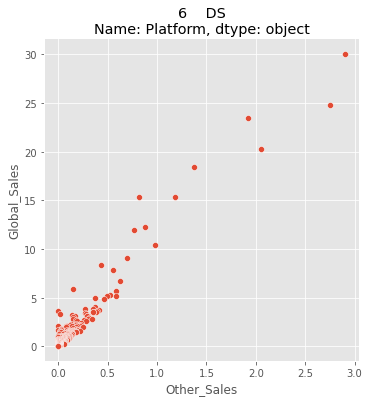

<Figure size 576x432 with 0 Axes>

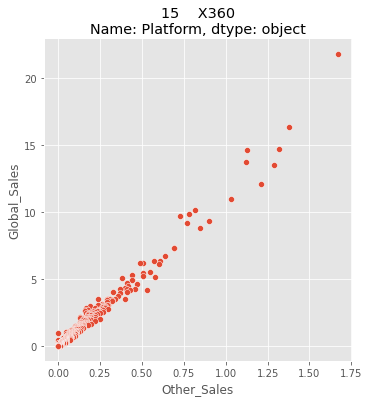

<Figure size 576x432 with 0 Axes>

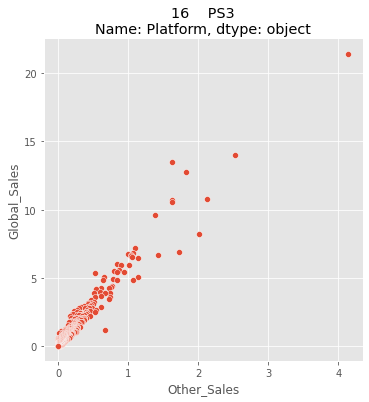

<Figure size 576x432 with 0 Axes>

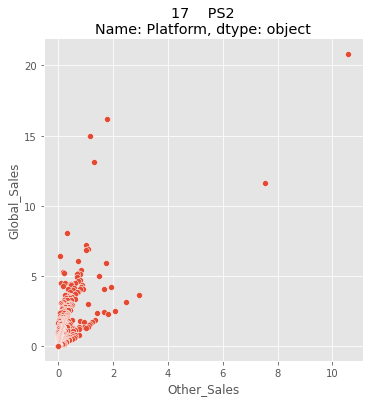

<Figure size 576x432 with 0 Axes>

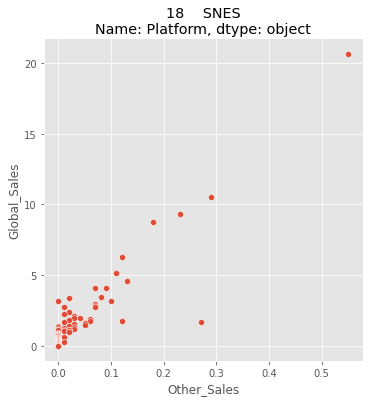

<Figure size 576x432 with 0 Axes>

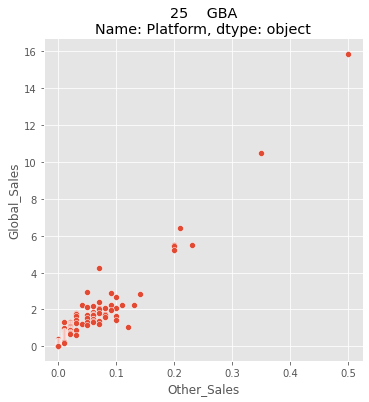

<Figure size 576x432 with 0 Axes>

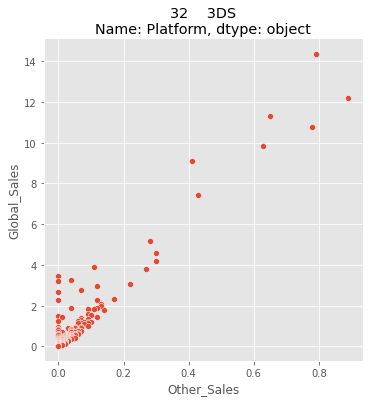

<Figure size 576x432 with 0 Axes>

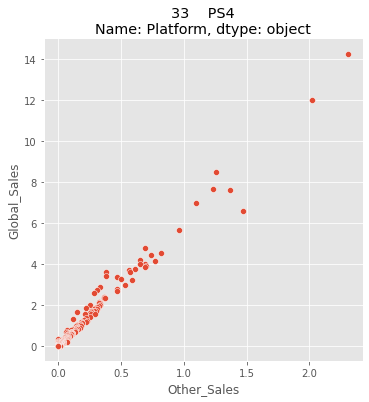

<Figure size 576x432 with 0 Axes>

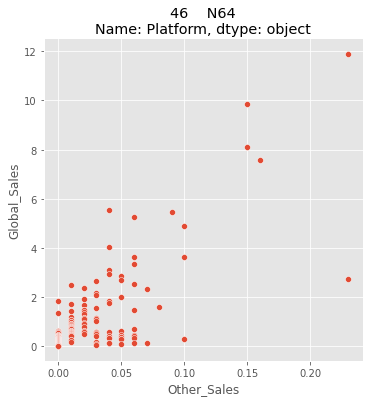

<Figure size 576x432 with 0 Axes>

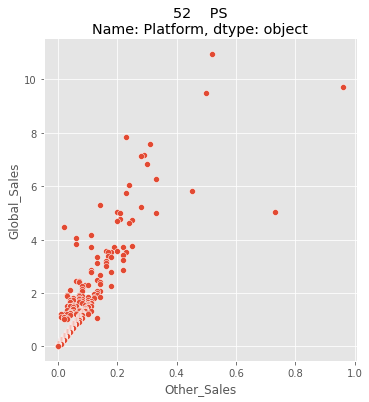

<Figure size 576x432 with 0 Axes>

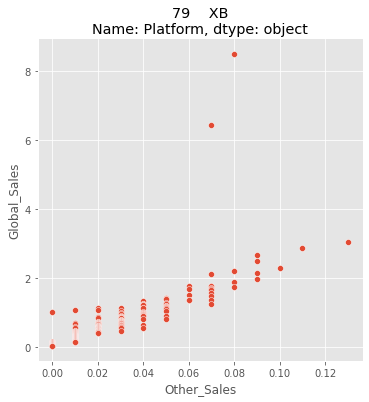

<Figure size 576x432 with 0 Axes>

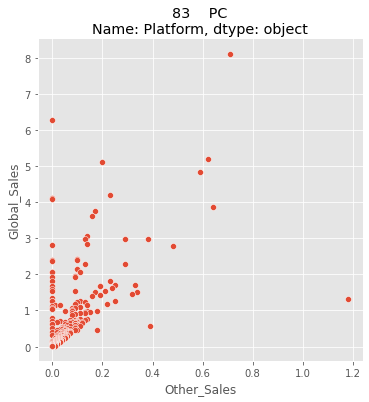

In [101]:
pooled_scatters(data, data['Genre'])

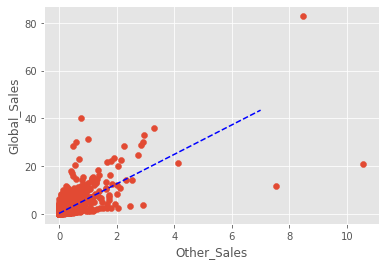

In [106]:
# unpooled modeling

# fitting an ols model on entire dataset to explore relationship between other sales and global sales

from statsmodels.formula.api import ols

unpooled_model = ols('Global_Sales ~ Other_Sales', data).fit()
unpooled_est = unpooled_model.params

o = unpooled_est['Other_Sales']
i = unpooled_est['Intercept']

plt.scatter(data['Other_Sales'], data['Global_Sales'])
plt.xlabel('Other_Sales')
plt.ylabel('Global_Sales')

# plot line with slope and intercept
def abline(slope, intercept, ax=None, **kwargs):
    """Plot a line from slope and intercept"""
    axes = ax if ax else plt.gca()
    x_vals = np.array([0,7])
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals,  **kwargs)

abline(o, i, linestyle='--', color='blue')

In [ ]:
# pooled modeling

